# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

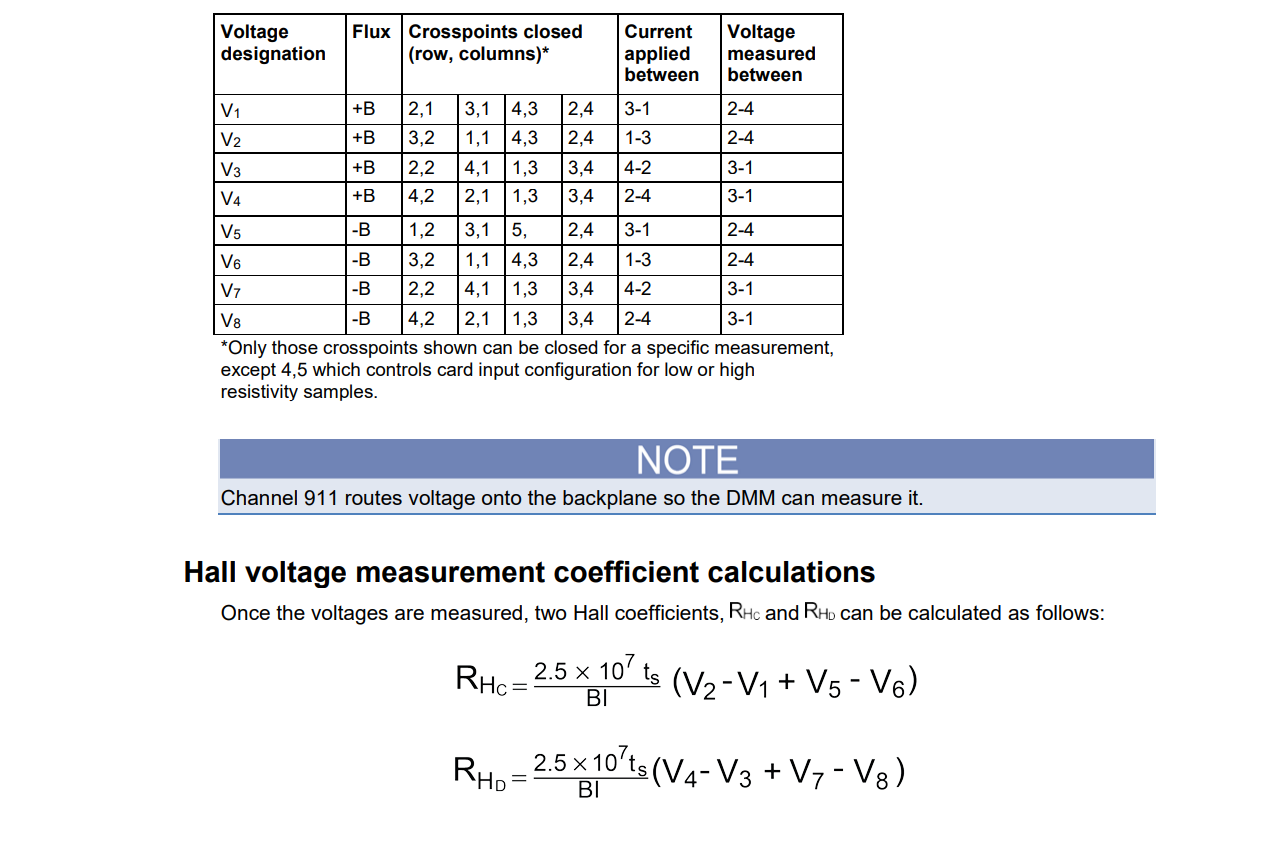

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [50]:
truncate = False # True it contains data from O to Bmax
path = r"C:\\users\\Admin\\Desktop\\Analysis\\Plots\\LCMO_PLD2\\HALL"
filename = 'LCMO_PLD2_100K_HALL_+5T_to_-5T.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49999.956641,99.973743,49320.80844,-48481.25599,-46586.73762,48016.74816,-0.001929,1000000.0
1,0.000001,49000.282617,99.952932,50102.02225,-49475.18228,-47467.18356,48861.25232,-0.001892,1000000.0
2,0.000001,48000.327930,99.945882,51044.41876,-50242.33910,-48314.60767,49729.39139,-0.001862,1000000.0
3,0.000001,47000.633789,99.946940,52003.95108,-51290.26541,-49362.03615,50818.08810,-0.002012,1000000.0
4,0.000001,46000.497852,99.947917,53057.54582,-52308.36481,-50355.82343,51870.49346,-0.002078,1000000.0
...,...,...,...,...,...,...,...,...,...
197,0.000001,46000.155664,99.999049,54631.87202,-53722.15758,-51683.57528,53074.20376,-0.002034,1000000.0
198,0.000001,47000.338867,99.999392,53279.16448,-52504.74738,-50432.32867,51946.45496,-0.002041,1000000.0
199,0.000001,48000.415625,99.999426,52028.27686,-51282.31308,-49411.75209,50803.64845,-0.002001,1000000.0
200,0.000001,49000.403125,99.999712,51029.88109,-50204.17678,-48317.11912,49718.50063,-0.001974,1000000.0


### Converting B to integer B

In [51]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V2', 'V3', 'V4', 'V1', 'Rel_value', 'multiplier']].copy()

In [52]:

df.head()

,I,B,B_int,T,V2,V3,V4,V1,Rel_value,multiplier
0,0.000001,49999.956641,50000,99.973743,-48481.25599,-46586.73762,48016.74816,49320.80844,-0.001929,1000000.0
1,0.000001,49000.282617,49000,99.952932,-49475.18228,-47467.18356,48861.25232,50102.02225,-0.001892,1000000.0
2,0.000001,48000.327930,48000,99.945882,-50242.33910,-48314.60767,49729.39139,51044.41876,-0.001862,1000000.0
3,0.000001,47000.633789,47000,99.946940,-51290.26541,-49362.03615,50818.08810,52003.95108,-0.002012,1000000.0
4,0.000001,46000.497852,46000,99.947917,-52308.36481,-50355.82343,51870.49346,53057.54582,-0.002078,1000000.0


In [53]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

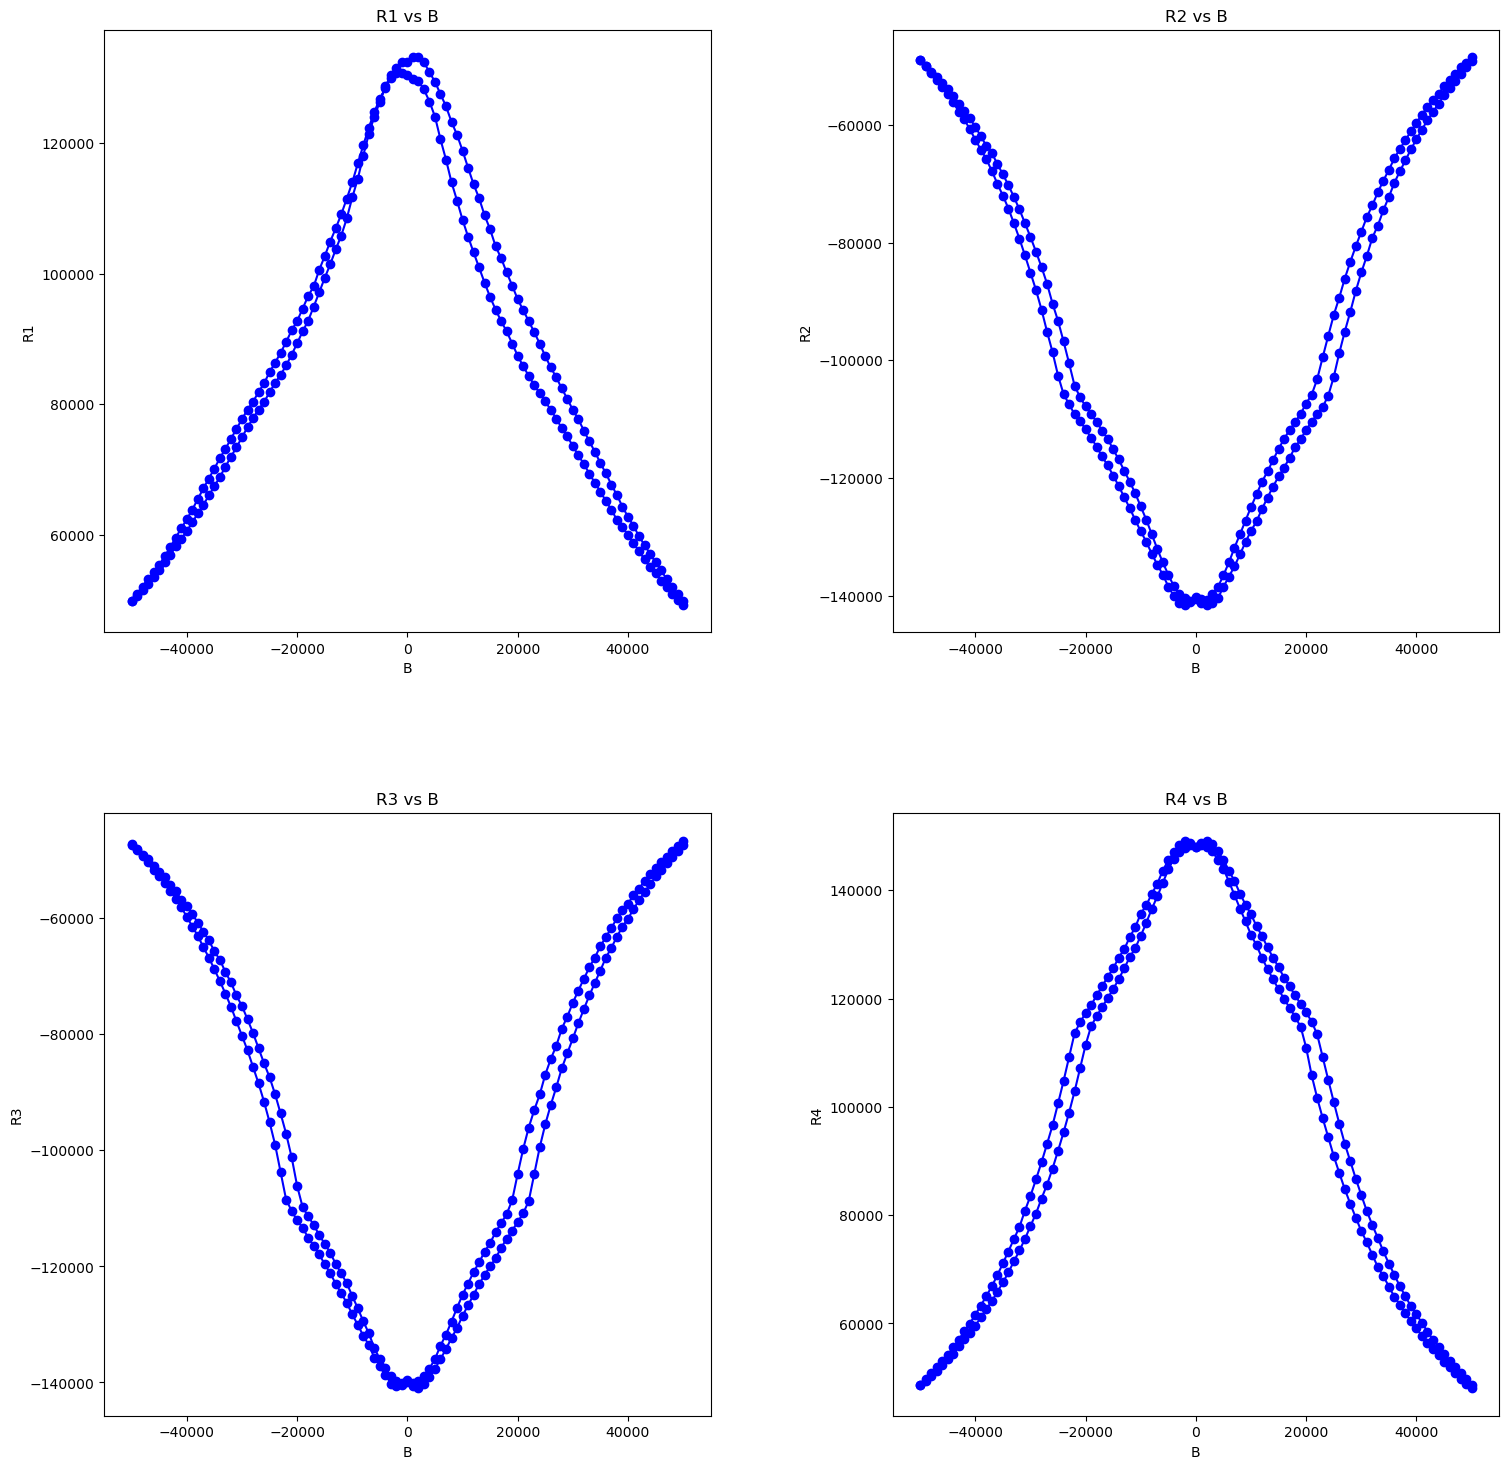

In [54]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [55]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

In [56]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

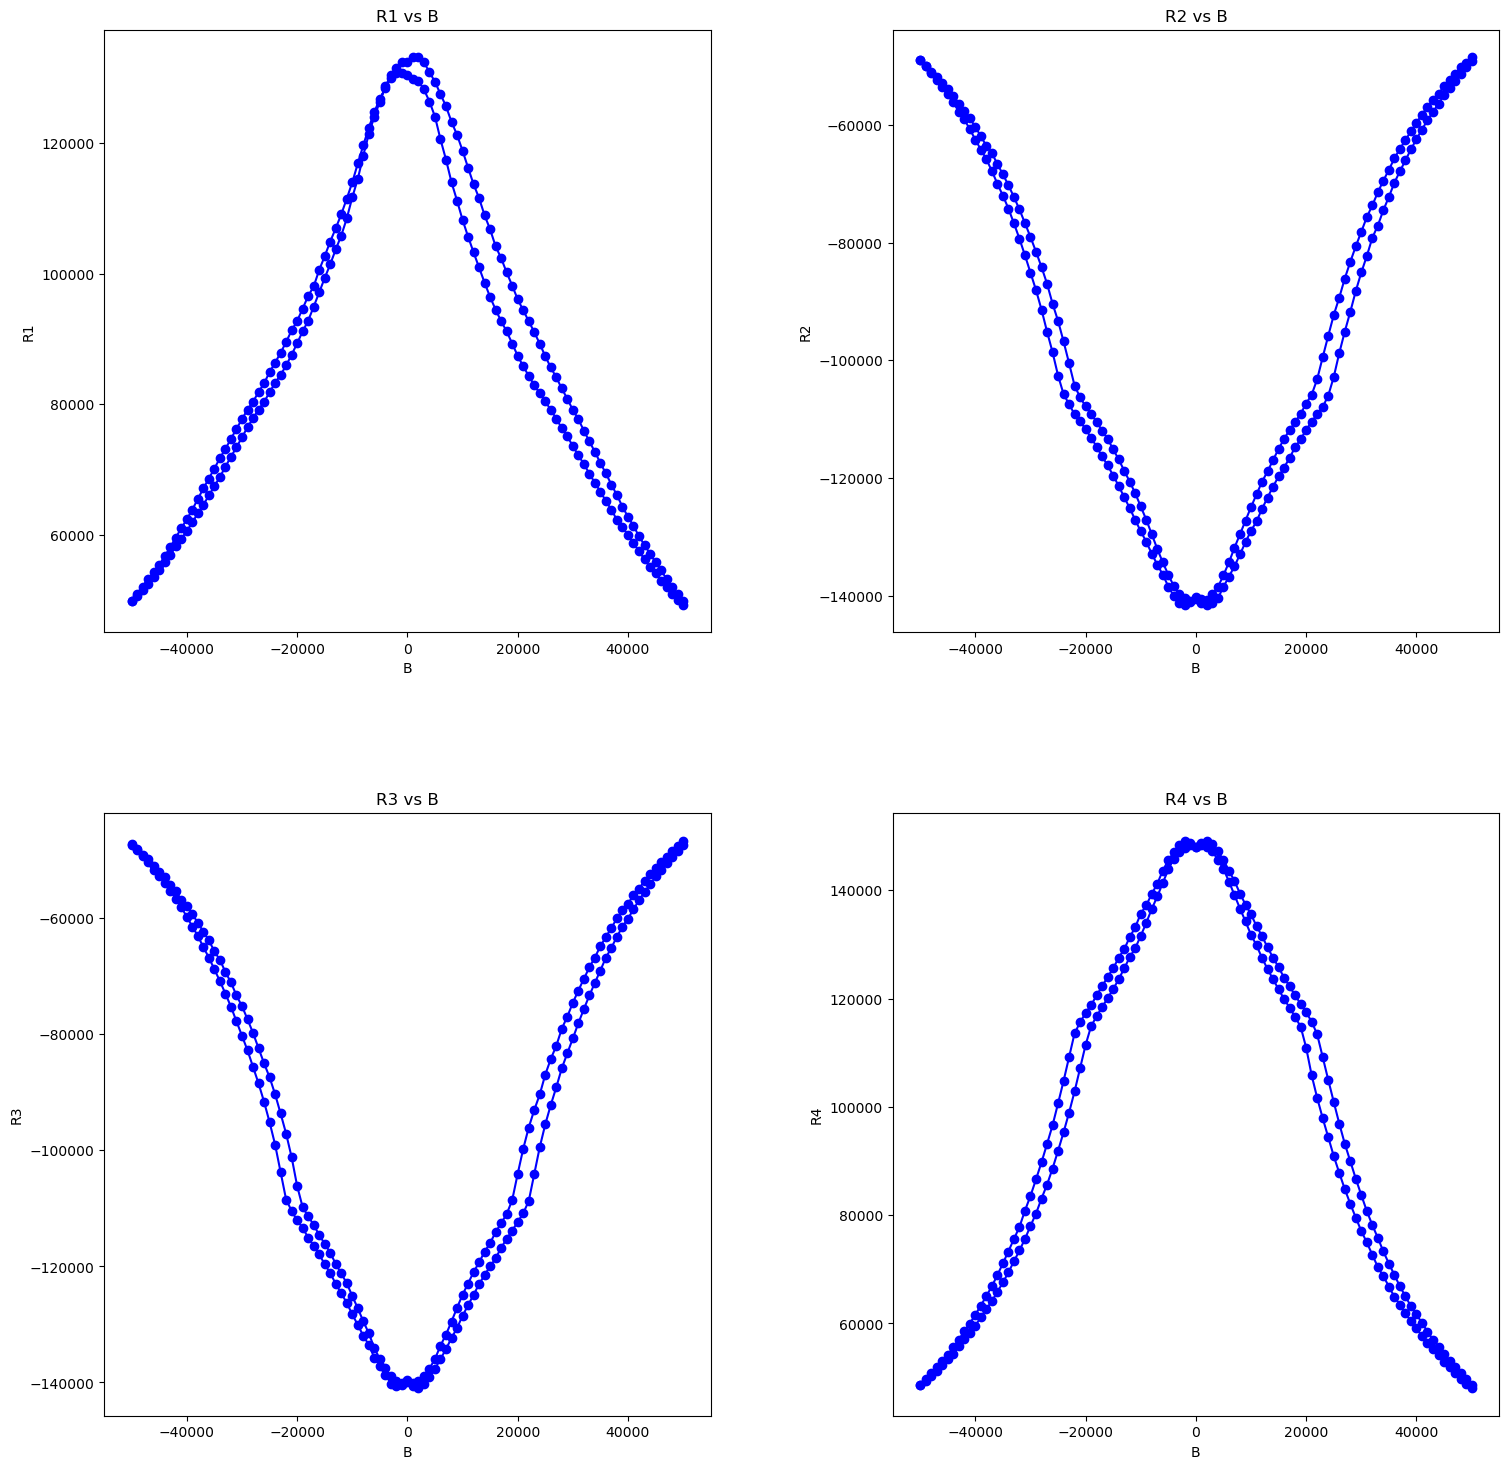

In [57]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [58]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

50000 -50000


In [59]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

100

In [60]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [61]:
df_dec.head()

,I,B,B_int,T,V2,V3,V4,V1,Rel_value,multiplier
0,0.000001,49999.956641,50000,99.973743,-48481.25599,-46586.73762,48016.74816,49320.80844,-0.001929,1000000.0
1,0.000001,49000.282617,49000,99.952932,-49475.18228,-47467.18356,48861.25232,50102.02225,-0.001892,1000000.0
2,0.000001,48000.327930,48000,99.945882,-50242.33910,-48314.60767,49729.39139,51044.41876,-0.001862,1000000.0
3,0.000001,47000.633789,47000,99.946940,-51290.26541,-49362.03615,50818.08810,52003.95108,-0.002012,1000000.0
4,0.000001,46000.497852,46000,99.947917,-52308.36481,-50355.82343,51870.49346,53057.54582,-0.002078,1000000.0


In [62]:
df_inc.head()

,I,B,B_int,T,V2,V3,V4,V1,Rel_value,multiplier
101,0.000001,-50000.589844,-50000,99.998164,-48973.53782,-47320.20359,48590.03386,49847.41231,-0.001934,1000000.0
102,0.000001,-49000.292969,-49000,99.999804,-50021.21010,-48063.37412,49447.96229,50711.62912,-0.001925,1000000.0
103,0.000001,-48000.531836,-48000,99.998874,-51050.07802,-49010.50266,50369.09695,51659.48542,-0.001905,1000000.0
104,0.000001,-47000.632031,-47000,99.999528,-51858.36706,-49846.16169,51200.20676,52562.55992,-0.001849,1000000.0
105,0.000001,-46000.223047,-46000,99.998588,-52822.47347,-50911.61058,52399.28016,53660.02582,-0.002062,1000000.0


In [63]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [64]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,50000,99.973743,49320.80844,-48481.25599,-46586.73762,48016.74816,49847.41231,-48973.53782,-47320.20359,48590.03386,1000000.0
1,0.000001,49000,99.952932,50102.02225,-49475.18228,-47467.18356,48861.25232,50711.62912,-50021.21010,-48063.37412,49447.96229,1000000.0
2,0.000001,48000,99.945882,51044.41876,-50242.33910,-48314.60767,49729.39139,51659.48542,-51050.07802,-49010.50266,50369.09695,1000000.0
3,0.000001,47000,99.946940,52003.95108,-51290.26541,-49362.03615,50818.08810,52562.55992,-51858.36706,-49846.16169,51200.20676,1000000.0
4,0.000001,46000,99.947917,53057.54582,-52308.36481,-50355.82343,51870.49346,53660.02582,-52822.47347,-50911.61058,52399.28016,1000000.0


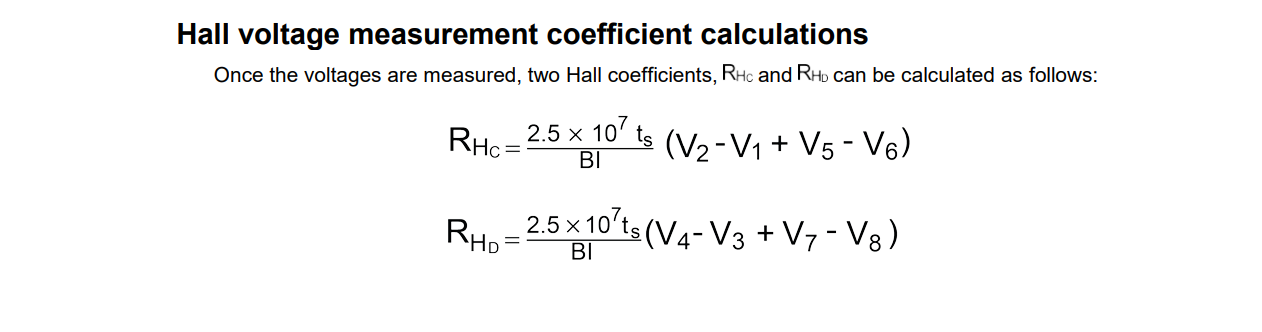
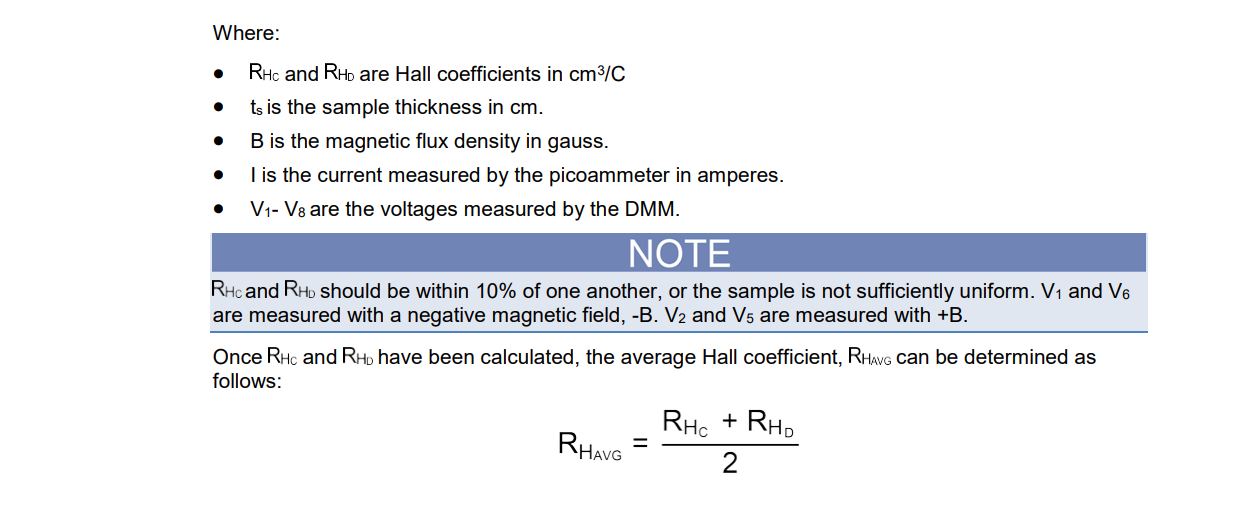

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [65]:
data_dec['RHc'] = (data_dec['V2'] - data_dec['V1'] + data_dec['V5'] - data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (data_dec['V4'] - data_dec['V3'] + data_dec['V7'] - data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

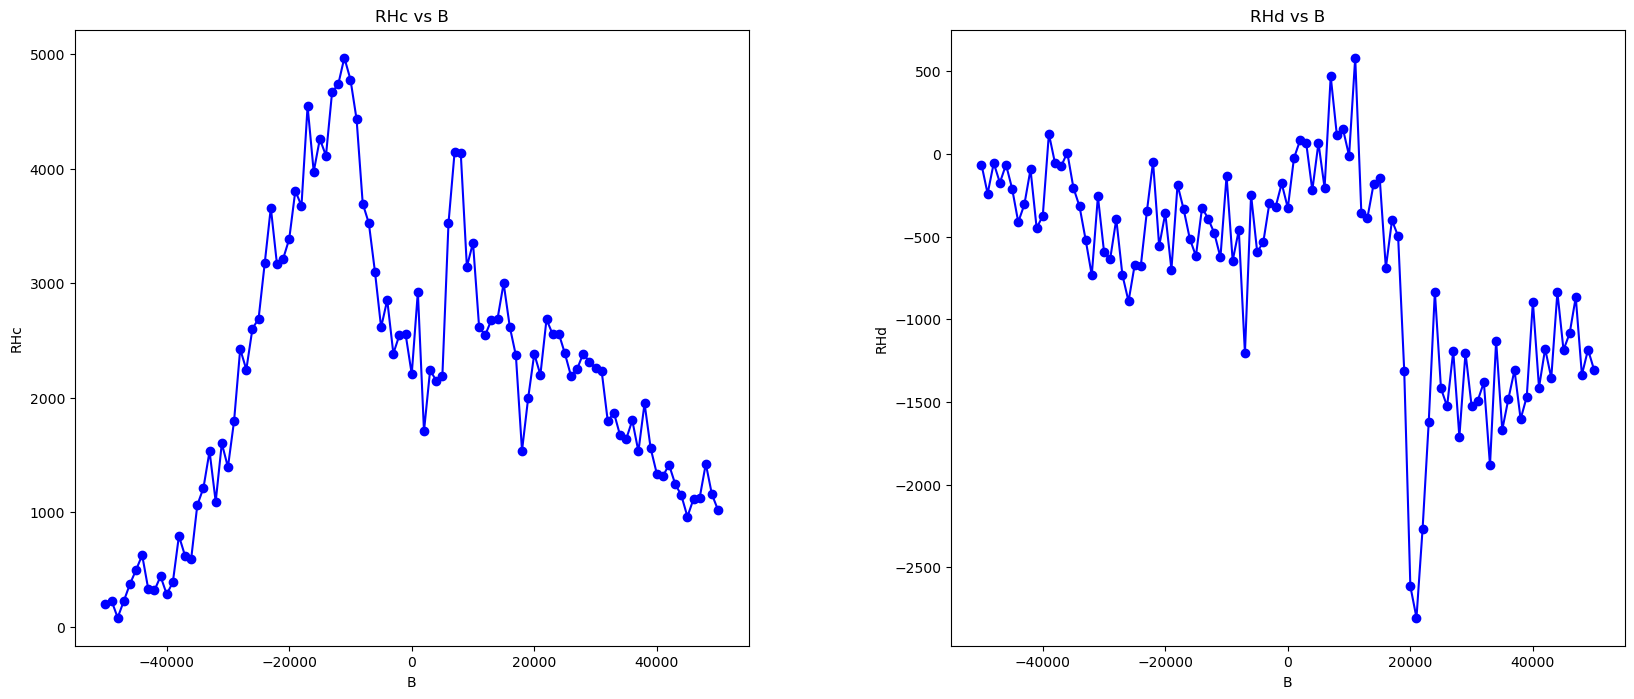

In [66]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

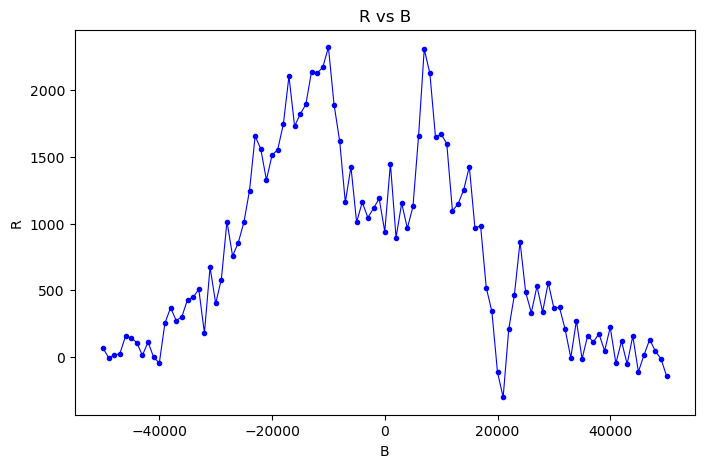

In [67]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [68]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,-50000,99.998164,49847.41231,-48973.53782,-47320.20359,48590.03386,49320.80844,-48481.25599,-46586.73762,48016.74816,1000000.0
1,0.000001,-49000,99.999804,50711.62912,-50021.21010,-48063.37412,49447.96229,50102.02225,-49475.18228,-47467.18356,48861.25232,1000000.0
2,0.000001,-48000,99.998874,51659.48542,-51050.07802,-49010.50266,50369.09695,51044.41876,-50242.33910,-48314.60767,49729.39139,1000000.0
3,0.000001,-47000,99.999528,52562.55992,-51858.36706,-49846.16169,51200.20676,52003.95108,-51290.26541,-49362.03615,50818.08810,1000000.0
4,0.000001,-46000,99.998588,53660.02582,-52822.47347,-50911.61058,52399.28016,53057.54582,-52308.36481,-50355.82343,51870.49346,1000000.0


### Hall resistance calculation

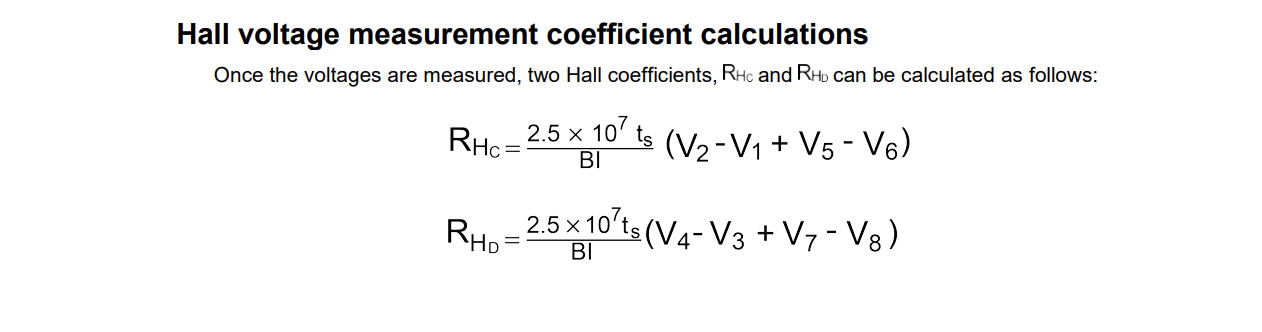

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [69]:
data_inc['RHc'] = (data_inc['V2'] - data_inc['V1'] + data_inc['V5'] - data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (data_inc['V4'] - data_inc['V3'] + data_inc['V7'] - data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

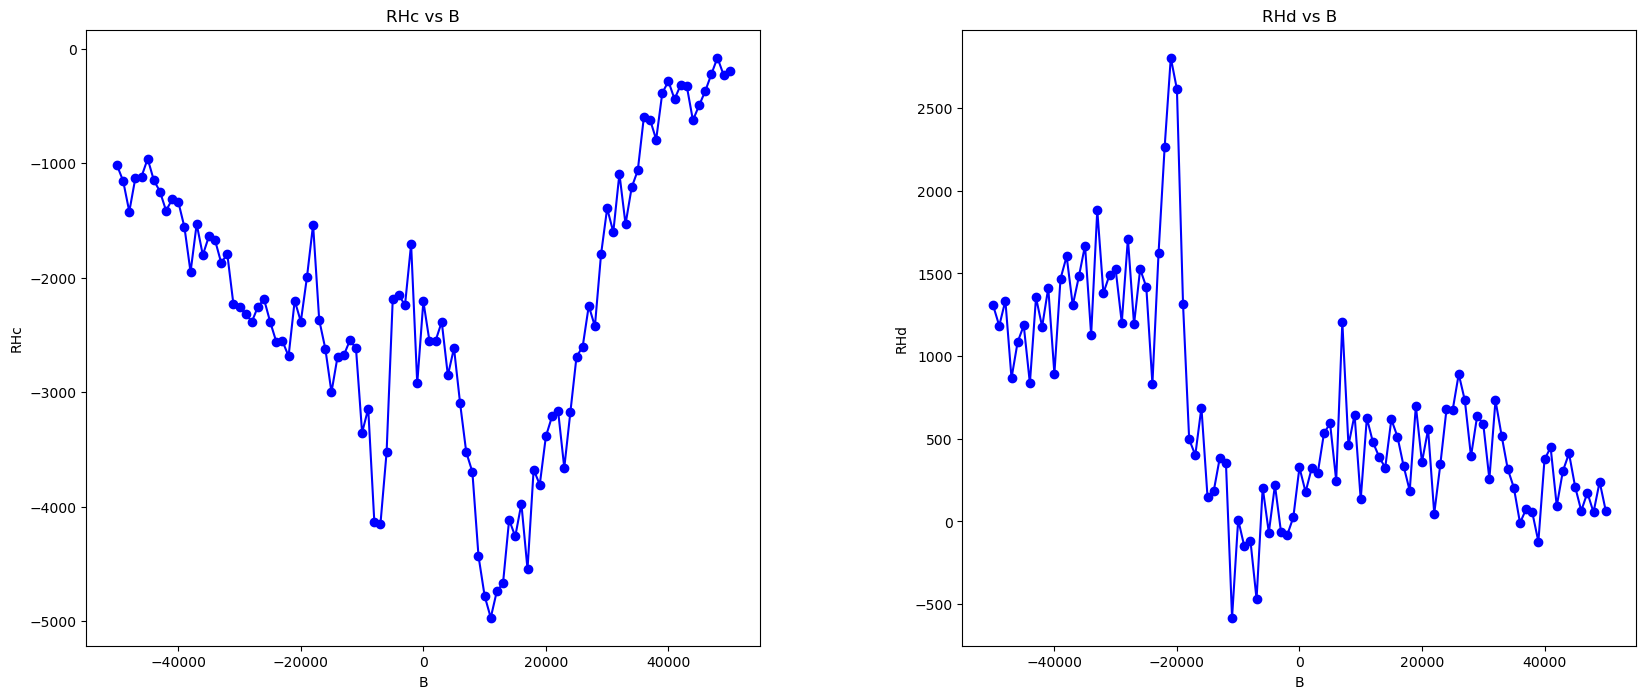

In [70]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

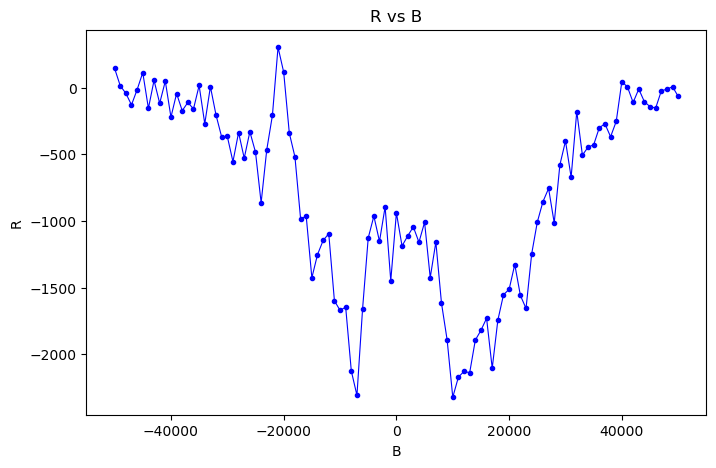

In [71]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

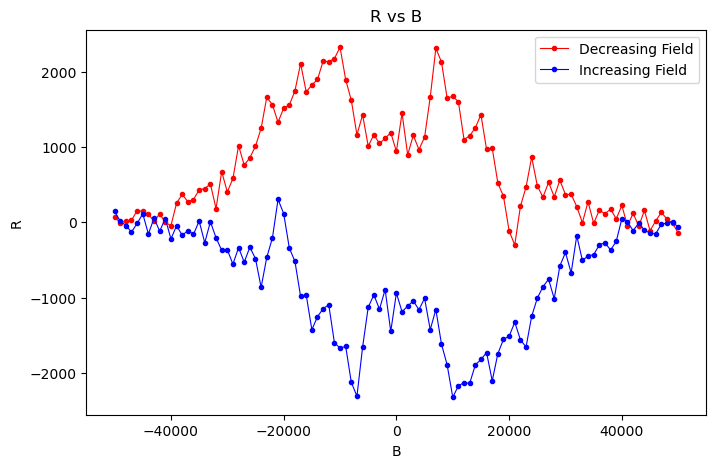

In [72]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()